# EDA on TSA Complaints
### Kaylynn Mosier
### 31 October 2024

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
complaints_by_airport = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC640/Data/complaints-by-airport.csv")
complaints_by_category = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC640/Data/complaints-by-category.csv")
complaints_by_subcategory = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC640/Data/complaints-by-subcategory.csv")
look_up_codes = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC640/Data/iata-icao.csv")

## Complaints by Airport

In [3]:
complaints_by_airport.head()

,pdf_report_date,airport,year_month,count
0,2019-02,ABE,2015-01,0
1,2019-02,ABE,2015-02,0
2,2019-02,ABE,2015-03,0
3,2019-02,ABE,2015-04,0
4,2019-02,ABE,2015-05,2


In [4]:
# Drop rows with na values
complaints_by_airport.dropna(axis=0, inplace=True)
complaints_by_airport.isna().sum()

pdf_report_date    0
airport            0
year_month         0
count              0
dtype: int64

In [5]:
# Drop pdf_report_date from complaints_by_airport
complaints_by_airport = complaints_by_airport.drop('pdf_report_date', axis=1)

# Separate year_month into year and month columns
complaints_by_airport[['year', 'month']] = complaints_by_airport['year_month'].str.split('-', expand=True)
complaints_by_airport.head()

,airport,year_month,count,year,month
0,ABE,2015-01,0,2015,01
1,ABE,2015-02,0,2015,02
2,ABE,2015-03,0,2015,03
3,ABE,2015-04,0,2015,04
4,ABE,2015-05,2,2015,05


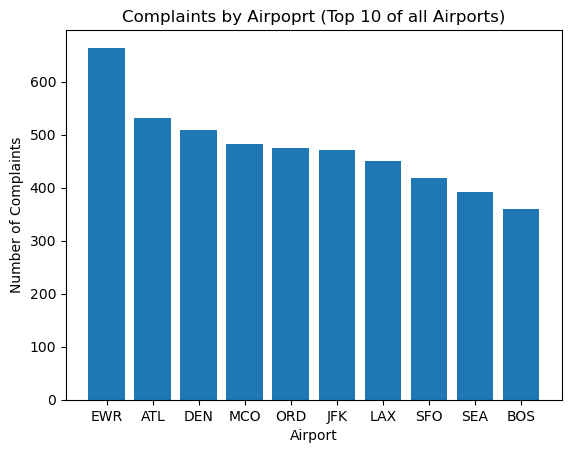

In [6]:
# Find 10 airports with the most complaints
group_by_airport = complaints_by_airport.groupby('airport').max()
group_by_airport = group_by_airport.sort_values('count', ascending=False)
group_by_airport = group_by_airport[:10]
group_by_airport.reset_index(inplace=True)

# Plot number of complaints by airport
plt.bar(group_by_airport['airport'], group_by_airport['count'])
plt.xlabel('Airport')
plt.ylabel('Number of Complaints')
plt.title('Complaints by Airpoprt (Top 10 of all Airports)')
plt.show()

## Complaints by Category

In [7]:
complaints_by_category.head()

,pdf_report_date,airport,category,year_month,count,clean_cat,clean_cat_status
0,2019-02,ABE,Hazardous Materials Safety,2015-01,0,Hazardous Materials Safety,original
1,2019-02,ABE,Mishandling of Passenger Property,2015-01,0,Mishandling of Passenger Property,original
2,2019-02,ABE,Hazardous Materials Safety,2015-02,0,Hazardous Materials Safety,original
3,2019-02,ABE,Mishandling of Passenger Property,2015-02,0,Mishandling of Passenger Property,original
4,2019-02,ABE,Hazardous Materials Safety,2015-03,0,Hazardous Materials Safety,original


In [8]:
# Drop pdf_report_date from complaints_by_airport
complaints_by_category = complaints_by_category.drop('pdf_report_date', axis=1)

# Separate year_month into year and month columns
complaints_by_category[['year', 'month']] = complaints_by_category['year_month'].str.split('-', expand=True)
complaints_by_category.head()

,airport,category,year_month,count,clean_cat,clean_cat_status,year,month
0,ABE,Hazardous Materials Safety,2015-01,0,Hazardous Materials Safety,original,2015,01
1,ABE,Mishandling of Passenger Property,2015-01,0,Mishandling of Passenger Property,original,2015,01
2,ABE,Hazardous Materials Safety,2015-02,0,Hazardous Materials Safety,original,2015,02
3,ABE,Mishandling of Passenger Property,2015-02,0,Mishandling of Passenger Property,original,2015,02
4,ABE,Hazardous Materials Safety,2015-03,0,Hazardous Materials Safety,original,2015,03


In [9]:
# Drop rows with na values
complaints_by_category.dropna(axis=0, inplace=True)
complaints_by_category.isna().sum()

airport             0
category            0
year_month          0
count               0
clean_cat           0
clean_cat_status    0
year                0
month               0
dtype: int64

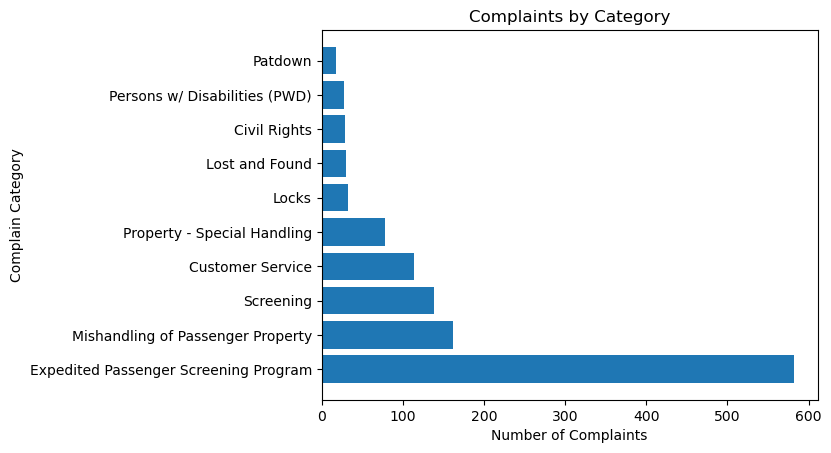

In [10]:
# Find categories with the most complaints
group_by_category = complaints_by_category[['count', 'clean_cat']]
group_by_category = group_by_category.groupby('clean_cat').max()
group_by_category = group_by_category.sort_values('count', ascending=False)
group_by_category = group_by_category[:10]
group_by_category.reset_index(inplace=True)

# Plot number of complaints by airport
plt.barh(group_by_category['clean_cat'], group_by_category['count'])
plt.ylabel('Complain Category')
plt.xlabel('Number of Complaints')
plt.title('Complaints by Category')
plt.show()

In [11]:
# Find categories with the most complaints in airport with the most complaints
top_10_airports_category = complaints_by_category.loc[complaints_by_category['airport'].isin(['EWR', 'ATL', 'DEN', 'MCO',
                                                                                             'ORD', 'JFK', 'LAX', 'SFO',
                                                                                             'SEA', 'BOS'])]
top_10_airports_category = top_10_airports_category[['airport','count', 'clean_cat']]
top_10_airports_category = top_10_airports_category.groupby(['airport', 'clean_cat']).max()
top_10_airports_category = top_10_airports_category.sort_values('count', ascending=False)
top_10_airports_category[:10]

,,count
airport,clean_cat,
EWR,Expedited Passenger Screening Program,582
ORD,Expedited Passenger Screening Program,421
ATL,Expedited Passenger Screening Program,377
DEN,Expedited Passenger Screening Program,375
SFO,Expedited Passenger Screening Program,373
LAX,Expedited Passenger Screening Program,370
JFK,Expedited Passenger Screening Program,348
BOS,Expedited Passenger Screening Program,299
MCO,Expedited Passenger Screening Program,285


Looks like top airpors have the same top category of complaints; Expedited Passenger Screening Program

## Complaints by Subcategory

In [12]:
complaints_by_subcategory.head()

,pdf_report_date,airport,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed
0,2019-02,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False
1,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
2,2019-02,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False
3,2019-02,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False
4,2019-02,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False


In [13]:
# Drop pdf_report_date from complaints_by_airport
complaints_by_subcategory = complaints_by_subcategory.drop('pdf_report_date', axis=1)

# Separate year_month into year and month columns
complaints_by_subcategory[['year', 'month']] = complaints_by_subcategory['year_month'].str.split('-', expand=True)
complaints_by_subcategory.head()

,airport,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed,year,month
0,ABE,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False,2015,01
1,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False,2015,01
2,ABE,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False,2015,02
3,ABE,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False,2015,02
4,ABE,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False,2015,03


In [14]:
# Drop rows with na values
complaints_by_subcategory.dropna(axis=0, inplace=True)
complaints_by_subcategory.isna().sum()

airport                       0
category                      0
subcategory                   0
year_month                    0
count                         0
clean_cat                     0
clean_subcat                  0
clean_cat_status              0
clean_subcat_status           0
is_category_prefix_removed    0
year                          0
month                         0
dtype: int64

## Look Up Codes

In [15]:
look_up_codes

,country_code,region_name,iata,icao,airport,latitude,longitude
0,AE,Abu Zaby,AAN,OMAL,Al Ain International Airport,24.2617,55.6092
1,AE,Abu Zaby,AUH,OMAA,Abu Dhabi International Airport,24.4330,54.6511
2,AE,Abu Zaby,AYM,NaN,Yas Island Seaplane Base,24.4670,54.6103
3,AE,Abu Zaby,AZI,OMAD,Al Bateen Executive Airport,24.4283,54.4581
4,AE,Abu Zaby,DHF,OMAM,Al Dhafra Air Base,24.2482,54.5477
...,...,...,...,...,...,...,...
8932,ZW,Masvingo,MVZ,FVMV,Masvingo Airport,-20.0553,30.8591
8933,ZW,Matabeleland North,HWN,FVWN,Hwange National Park Airport,-18.6299,27.0210
8934,ZW,Matabeleland North,VFA,FVFA,Victoria Falls Airport,-18.0959,25.8390
8935,ZW,Matabeleland North,WKI,FVWT,Hwange Town Airport,-18.3630,26.5198


In [16]:
# Drop rows with na values
look_up_codes.dropna(axis=0, inplace=True)
look_up_codes.isna().sum()

country_code    0
region_name     0
iata            0
icao            0
airport         0
latitude        0
longitude       0
dtype: int64

# Join datasets

In [17]:
# Set index of each dataframe
complaints_by_airport.set_index('airport', inplace=True)
complaints_by_category.set_index('airport', inplace=True)
complaints_by_subcategory.set_index('airport', inplace=True)
look_up_codes.set_index('iata', inplace=True)

In [18]:
# Join complaints_by_airport and look_up codes by airport code
complaints_by_airport = pd.merge(look_up_codes, complaints_by_airport, left_index=True, right_index=True)
complaints_by_airport.reset_index(inplace=True)
complaints_by_airport.head()

,iata,country_code,region_name,icao,airport,latitude,longitude,year_month,count,year,month
0,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,2015-01,0,2015,01
1,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,2015-02,0,2015,02
2,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,2015-03,0,2015,03
3,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,2015-04,0,2015,04
4,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,2015-05,2,2015,05


In [19]:
# Join complaints_by_category and look_up_codes by airport code
complaints_by_category = pd.merge(look_up_codes, complaints_by_category, left_index=True, right_index=True)
complaints_by_category.reset_index(inplace=True)
complaints_by_category.head()

,iata,country_code,region_name,icao,airport,latitude,longitude,category,year_month,count,clean_cat,clean_cat_status,year,month
0,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Hazardous Materials Safety,2015-01,0,Hazardous Materials Safety,original,2015,01
1,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Mishandling of Passenger Property,2015-01,0,Mishandling of Passenger Property,original,2015,01
2,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Hazardous Materials Safety,2015-02,0,Hazardous Materials Safety,original,2015,02
3,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Mishandling of Passenger Property,2015-02,0,Mishandling of Passenger Property,original,2015,02
4,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Hazardous Materials Safety,2015-03,0,Hazardous Materials Safety,original,2015,03


In [20]:
# Join complaints_by_subcategory and look_up_codes by airport code
complaints_by_subcategory = pd.merge(look_up_codes, complaints_by_subcategory, left_index=True, right_index=True)
complaints_by_subcategory.reset_index(inplace=True)
complaints_by_subcategory.head()

,iata,country_code,region_name,icao,airport,latitude,longitude,category,subcategory,year_month,count,clean_cat,clean_subcat,clean_cat_status,clean_subcat_status,is_category_prefix_removed,year,month
0,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Hazardous Materials Safety,General,2015-01,0,Hazardous Materials Safety,General,original,original,False,2015,01
1,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-01,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False,2015,01
2,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Hazardous Materials Safety,General,2015-02,0,Hazardous Materials Safety,General,original,original,False,2015,02
3,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Mishandling of Passenger Property,Damaged/Missing Items--Checked Baggage,2015-02,0,Mishandling of Passenger Property,*Damaged/Missing Items--Checked Baggage,original,original,False,2015,02
4,ABE,US,Pennsylvania,KABE,Lehigh Valley International Airport,40.6521,-75.4408,Hazardous Materials Safety,General,2015-03,0,Hazardous Materials Safety,General,original,original,False,2015,03


## Visual Exploration

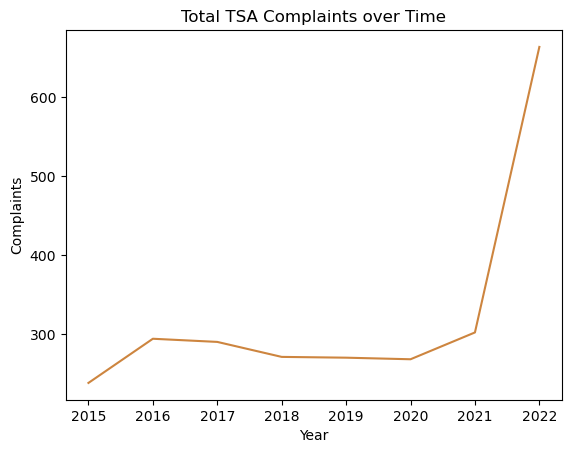

In [51]:
# Calculate number of complaints by year for all airports
complaints_by_year = complaints_by_airport[['year', 'count']]
complaints_by_year = complaints_by_year.groupby('year')['count'].max().reset_index()

# Remove 2023 ane 2024 values
complaints_by_year = complaints_by_year[complaints_by_year['year'] != '2023']
complaints_by_year = complaints_by_year[complaints_by_year['year'] != '2024']

# Plot number of complaints by year for all airports
plt.plot(complaints_by_year['year'], complaints_by_year['count'], color='peru')
plt.xlabel('Year')
plt.ylabel('Complaints')
plt.title('Total TSA Complaints over Time')
plt.show()

There is a huge peak in complaints in 2022. Complaints then decrease in both 2023 and 2024, but not to the level they were at in 2021. 

What happened in 2022 that caused so many complaints?

## Correlation of Count of TSA complaints with different variables

In [61]:
# Select columns to go into correlation table
correlation_columns = complaints_by_category.loc[:, ('iata', 'region_name', 'icao', 'airport', 'category', 'year', 'month','count')]

# Recode iata, icao, region name, and category as numerical values to include in correlation table
correlation_columns['iata'] = pd.factorize(correlation_columns['iata'])[0]
correlation_columns['region_name'] = pd.factorize(correlation_columns['region_name'])[0]
correlation_columns['icao'] = pd.factorize(correlation_columns['icao'])[0]
correlation_columns['airport'] = pd.factorize(correlation_columns['airport'])[0]
correlation_columns['category'] = pd.factorize(correlation_columns['category'])[0]
correlation_columns

,iata,region_name,icao,airport,category,year,month,count
0,0,0,0,0,0,2015,01,0
1,0,0,0,0,1,2015,01,0
2,0,0,0,0,0,2015,02,0
3,0,0,0,0,1,2015,02,0
4,0,0,0,0,0,2015,03,0
...,...,...,...,...,...,...,...,...
236451,441,33,441,441,6,2015,11,0
236452,441,33,441,441,17,2015,12,1
236453,441,33,441,441,1,2015,12,0
236454,441,33,441,441,9,2015,12,0


Text(0.5, 1.0, 'Correlation of Variables with Count of TSA Complaints')

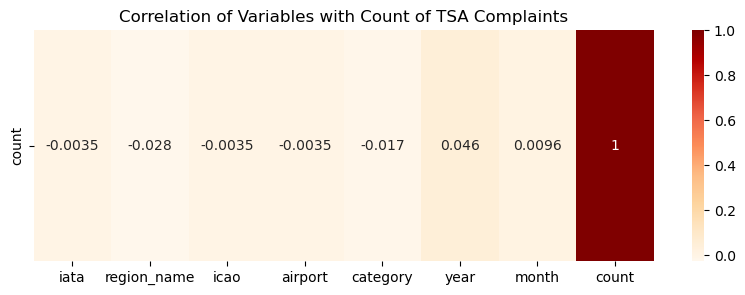

In [62]:
# Correlation matrix of each feature with quality
plt.figure(figsize=(10,3))
sns.heatmap(correlation_columns.corr().loc[['count'],:],annot=True,cmap='OrRd',cbar=True)
plt.title('Correlation of Variables with Count of TSA Complaints')

There is not a strong correlation of any one variable with count of TSA complaints. This indicates we cannot drastically reduce complaints by focusing only in one area. 

IATA, ICAO, and airport all have the exact same correlation with count. This is because They are different ways variables that tell the same thing, in the future only one of these variables needs to be examined.

## Number of Complaints by State

In [24]:
# Find max complaints for each state in 2022
complaints_by_subcategory_state = complaints_by_subcategory.loc[complaints_by_subcategory['year'] == '2022']
complaints_by_subcategory_state = complaints_by_subcategory[['region_name', 'count']]
complaints_by_subcategory_state = complaints_by_subcategory_state.groupby(['region_name']).max().reset_index()
complaints_by_subcategory_state

,region_name,count
0,Alabama,21
1,Alaska,32
2,Arizona,193
3,Arkansas,23
4,Barrigada,13
...,...,...
58,Virginia,194
59,Washington,274
60,West Virginia,4
61,Wisconsin,39


In [25]:
# List of state names
state_names = ["Alaska", "Alabama", "Arkansas", "American Samoa", "Arizona", "California", "Colorado", "Connecticut", "District ", "of Columbia", "Delaware", "Florida", "Georgia", "Guam", "Hawaii", "Iowa", "Idaho", "Illinois", "Indiana", "Kansas", "Kentucky", "Louisiana", "Massachusetts", "Maryland", "Maine", "Michigan", "Minnesota", "Missouri", "Mississippi", "Montana", "North Carolina", "North Dakota", "Nebraska", "New Hampshire", "New Jersey", "New Mexico", "Nevada", "New York", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Virginia", "Virgin Islands", "Vermont", "Washington", "Wisconsin", "West Virginia", "Wyoming"]

# Remove regions that are not states in US
complaints_by_subcategory_state = complaints_by_subcategory_state[complaints_by_subcategory_state['region_name'].isin(state_names)]
complaints_by_subcategory_state.head()

# Export to r
complaints_by_subcategory_state.to_csv('complaints_by_subcategory_state.csv', index=False)

In [26]:
# Import from r with abbreviations
complaints_by_subcategory_state_abb = pd.read_csv("C:/Users/kayly/OneDrive/Desktop/MSDS/DSC640/complaints_by_subcategory_state_abb.csv")
complaints_by_subcategory_state_abb.drop('Unnamed: 0', axis=1, inplace=True)
complaints_by_subcategory_state_abb.head()

,region_name,count,abbreviation
0,Alabama,21,AL
1,Alaska,32,AK
2,Arizona,193,AZ
3,Arkansas,23,AR
4,California,361,CA


In [36]:
# Choropleth of number of complaints by state in 2022

import plotly
import plotly.express as px
 
# create figure
fig = px.choropleth(complaints_by_subcategory_state_abb, locations='abbreviation',
                    locationmode="USA-states", color='count', scope="usa", color_continuous_scale="OrRd")
fig.update_layout(
    title_text = '2022 TSA Complaints by State')
fig.show()

New Jersey was the state with the most complaints in 2022.

## Complaints by Category in New Jersey

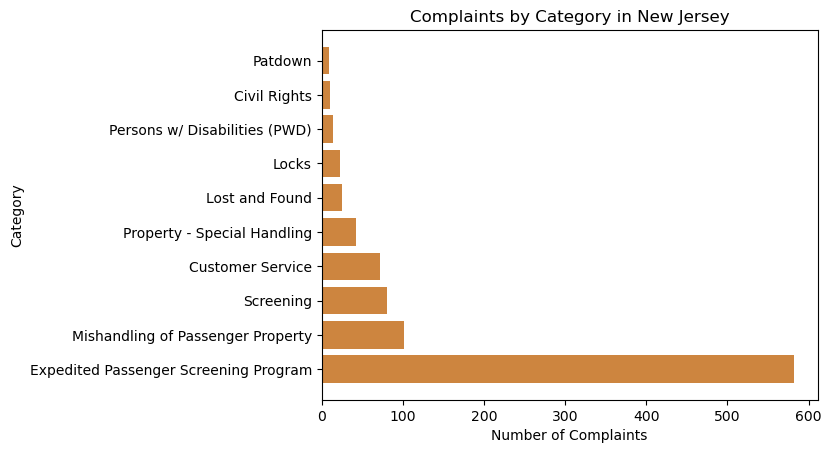

In [64]:
# Find categories with the most complaints in New Jersey
group_gy_category = complaints_by_category.loc[complaints_by_category['region_name'] == 'New Jersey']
group_by_category = group_gy_category[['count', 'clean_cat']]
group_by_category = group_by_category.groupby('clean_cat').max()
group_by_category = group_by_category.sort_values('count', ascending=False)
group_by_category = group_by_category[:10]
group_by_category.reset_index(inplace=True)

# Plot number of complaints by category
plt.barh(group_by_category['clean_cat'], group_by_category['count'], color = 'peru')
plt.ylabel('Category')
plt.xlabel('Number of Complaints')
plt.title('Complaints by Category in New Jersey')
plt.show()

## Complaints by Subcategory in New Jersey

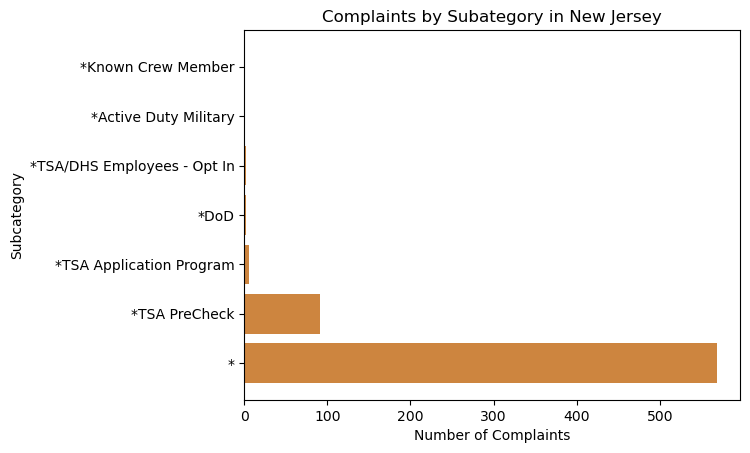

In [42]:
# Look at count of subcategory in New Jersey when category is Expedited Passenger Screening Program
group_by_subcategory = complaints_by_subcategory.loc[complaints_by_subcategory['region_name'] == 'New Jersey']
group_by_subcategory = group_by_subcategory.loc[group_by_subcategory['category']=='Expedited Passenger Screening Program']
group_by_subcategory = group_by_subcategory[['count', 'clean_subcat']]
group_by_subcategory = group_by_subcategory.groupby('clean_subcat').max()
group_by_subcategory = group_by_subcategory.sort_values('count', ascending=False)
group_by_subcategory.reset_index(inplace=True)
group_by_subcategory

# Plot number of complaints by subcategory
plt.barh(group_by_subcategory['clean_subcat'], group_by_subcategory['count'], color = 'peru')
plt.ylabel('Subcategory')
plt.xlabel('Number of Complaints')
plt.title('Complaints by Subategory in New Jersey')
plt.show()

The * indicates the subcategory is ambigious so we cannot gain any more insights from this. The best we can say is that the category responsible for the most complaints is Expidited Screening Passenger Programs.

In the future, it would be useful to have less ambigious subcategories so actionable inisghts can be drawn from data collected.

## Complaints by Month

In [30]:
# Boxplot of number of complaints by month for New Jersey


In [31]:
# Find number of complaints in each month for each year
new_jersey_by_month = complaints_by_airport.loc[complaints_by_airport['region_name'] == 'New Jersey']
new_jersey_by_month = new_jersey_by_month[['count', 'month', 'year']]
new_jersey_by_month = new_jersey_by_month.groupby(['month','year']).max()
new_jersey_by_month.reset_index(inplace=True)
new_jersey_by_month

,month,year,count
0,01,2015,103
1,01,2016,172
2,01,2017,190
3,01,2018,154
4,01,2019,109
...,...,...,...
104,12,2019,201
105,12,2020,34
106,12,2021,302
107,12,2022,591


In [32]:
January = new_jersey_by_month.loc[new_jersey_by_month['month']=='01']
February = new_jersey_by_month.loc[new_jersey_by_month['month']=='02']
March = new_jersey_by_month.loc[new_jersey_by_month['month']=='03']
April = new_jersey_by_month.loc[new_jersey_by_month['month']=='04']
May = new_jersey_by_month.loc[new_jersey_by_month['month']=='05']
June = new_jersey_by_month.loc[new_jersey_by_month['month']=='06']
July = new_jersey_by_month.loc[new_jersey_by_month['month']=='07']
August = new_jersey_by_month.loc[new_jersey_by_month['month']=='08']
September = new_jersey_by_month.loc[new_jersey_by_month['month']=='09']
October = new_jersey_by_month.loc[new_jersey_by_month['month']=='10']
November = new_jersey_by_month.loc[new_jersey_by_month['month']=='11']
December = new_jersey_by_month.loc[new_jersey_by_month['month']=='12']

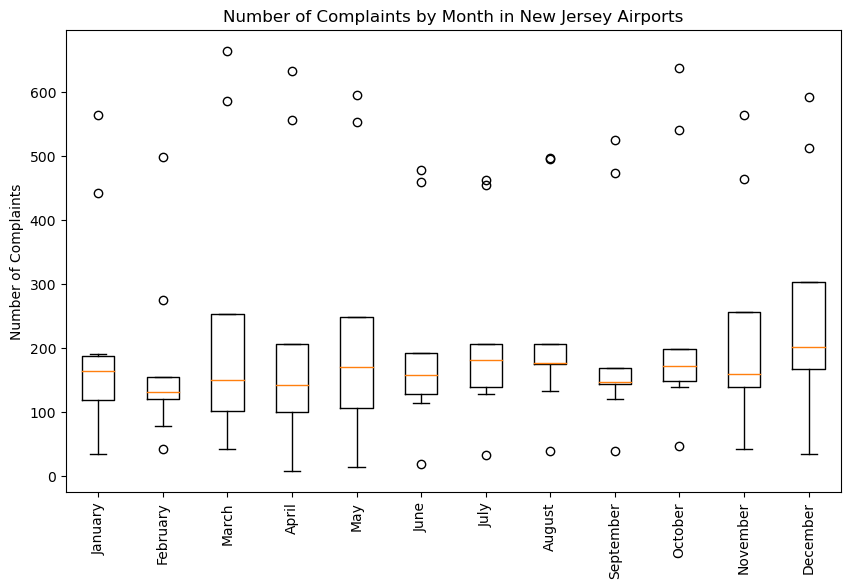

In [33]:
columns = [January['count'], February['count'], March['count'], April['count'], May['count'], June['count'], 
           July['count'], August['count'], September['count'], October['count'], November['count'], December['count']]

plt.figure(figsize=(10, 6))
plt.boxplot(columns, labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                              'October', 'November', 'December'])
plt.xticks(rotation=90)
plt.ylabel('Number of Complaints')
plt.title('Number of Complaints by Month in New Jersey Airports')
plt.show()

On average, December has the most complaints.

### Conclusions

TSA complaints are frequent and they must be reduced. Travelers are spending large amounts of money to travel through our airports, we should want to provide them with better service than we have been. 

We began by looking at the number of reported complaints per year. 2022 had the highest number of complaints. Since then, complaints have reduced but not to below COVID numbers. We wanted to understand what is causing these complaints. Our first search was to see if any variables (region, airport, complaint category, etc.) had a correlation with the number of complaints. If any of them did, we would know where to begin work. However, no categories had a strong correlation.

From there we wanted to understand if any area in particular had more complaints than other. Viewing a map of the USA color-coded for complaint number revealed New Jersey has significantly more complaints than other states. From here, we chose to dive further into the data on New Jersey to discover ways to reduce complaints.

In New Jersey, we found most complaints fell under the category 'Expedited Passenger Screening Program'. This indicates customers are usually complaining that they are waiting too long to get through required checkpoints within the airport. There are many checkpoints that could be causing this, so we tried to understand if there is a specific area customers complain about more. To do this, we examined the number of complaints by subcategory. Unfortunately, this did not yield any useful data because the subcategories listed on the complaint form are not specific enough.

A final aspect we examined was how complaints change throughout the year. We found that over the past 10 years on avearge, December ha the most complaints. This is likely due to a higher number of travelers in the airport during this time.

### Recommendations
 1) Increase staffing at major checkpoints (baggage drop off, security, customs, etc.): An increase in staff will allow more customers to be helped at once, reducing their wait time.
 
 3) Increase number of scanners at security checkpoints: Again this will reduce wait time for customers
 
 2) Update TSA complaints form to have better subcategory options. This will lead to better understanding of where to put resources
 
Recommendations 1 and 2 will be costly, however the cost will be outweiged by the gain in customers. If customers have a bette experience at the airport, they will be more likely to fly than drive which will increase profits.